Use the YELP dataset provided in the shared google drive at: https://drive.google.com/drive/folders/1AAGizX5MzcnM8apuukUYg-37tUH4dz2P?usp=sharing

## Yelp Data

For the final project, you will analyze data that has been made publicly available for educational and academic purposes. The data contains 3 main tables we will analyze:

  + `yelp_academic_dataset_business.csv` - contains information about  a subset of businesses having at least one Yelp review. Every distinct business has a unique `business_id`
  
  + `yelp_academic_dataset_review.csv` - contains a subset of Yelp reviews with a `business_id` indicating what business the review is for and a `user_id` to identify the user leaving the review
  
  + `yelp_academic_dataset_user.csv` - contains a subset of Yelp users identified by `user_id`
   
## What you need to do

Your goal in this notebook is to work through the problems below to perform some brief analyses of the `yelp_academic_dataset_business.csv` data. 

As always, it can be useful to document your thoughts, strategy, and assumptions as you go. If you are stuck on a particular problem, write down what you are trying to do and why you think you may be getting stuck.

## Setup - Run the following code to get started

In [1]:
# Options to display more rows and columns
# DO NOT REMOVE

import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 100)

In [2]:
# Load the libraries you need...

import missingno as msno
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Load the data

business_data = pd.read_csv(r'yelp_academic_dataset_business.csv')
business_data.head()

,address,attributes,attributes.AcceptsInsurance,attributes.AgesAllowed,attributes.Alcohol,attributes.Ambience,attributes.BYOB,attributes.BYOBCorkage,attributes.BestNights,attributes.BikeParking,attributes.BusinessAcceptsBitcoin,attributes.BusinessAcceptsCreditCards,attributes.BusinessParking,attributes.ByAppointmentOnly,attributes.Caters,attributes.CoatCheck,attributes.Corkage,attributes.DietaryRestrictions,attributes.DogsAllowed,attributes.DriveThru,attributes.GoodForDancing,attributes.GoodForKids,attributes.GoodForMeal,attributes.HairSpecializesIn,attributes.HappyHour,attributes.HasTV,attributes.Music,attributes.NoiseLevel,attributes.Open24Hours,attributes.OutdoorSeating,attributes.RestaurantsAttire,attributes.RestaurantsCounterService,attributes.RestaurantsDelivery,attributes.RestaurantsGoodForGroups,attributes.RestaurantsPriceRange2,attributes.RestaurantsReservations,attributes.RestaurantsTableService,attributes.RestaurantsTakeOut,attributes.Smoking,attributes.WheelchairAccessible,attributes.WiFi,business_id,categories,city,hours,hours.Friday,hours.Monday,hours.Saturday,hours.Sunday,hours.Thursday,hours.Tuesday,hours.Wednesday,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,1314 44 Avenue NE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,True,"{'garage': False, 'street': True, 'validated':...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,True,NaN,average,NaN,False,casual,NaN,False,True,2.0,True,NaN,True,NaN,NaN,NaN,Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Ho...",Calgary,NaN,11:0-21:0,8:30-17:0,11:0-21:0,NaN,11:0-21:0,11:0-21:0,11:0-21:0,1,51.091813,-114.031675,Minhas Micro Brewery,NaN,T2E 6L6,24,4.0,AB
1,NaN,NaN,NaN,NaN,none,NaN,NaN,NaN,NaN,False,NaN,True,"{'garage': False, 'street': True, 'validated':...",NaN,True,NaN,NaN,NaN,True,False,NaN,True,"{'dessert': False, 'latenight': False, 'lunch'...",NaN,NaN,False,NaN,NaN,NaN,True,casual,NaN,False,True,2.0,False,False,True,NaN,True,no,AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendo...",Henderson,NaN,17:0-23:0,NaN,17:0-23:0,17:0-23:0,NaN,NaN,NaN,0,35.960734,-114.939821,CK'S BBQ & Catering,NaN,89002,3,4.5,NV
2,1335 rue Beaubien E,NaN,NaN,NaN,beer_and_wine,"{'romantic': False, 'intimate': False, 'classy...",NaN,NaN,NaN,True,NaN,False,"{'garage': False, 'street': False, 'validated'...",NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,True,"{'dessert': False, 'latenight': False, 'lunch'...",NaN,NaN,True,NaN,average,NaN,False,casual,NaN,False,True,2.0,True,True,False,NaN,NaN,free,O8S5hYJ1SMc8fA4QBtVujA,"Breakfast & Brunch, Restaurants, French, Sandw...",Montréal,NaN,10:0-22:0,10:0-22:0,10:0-22:0,10:0-22:0,10:0-22:0,10:0-22:0,10:0-22:0,0,45.540503,-73.599300,La Bastringue,Rosemont-La Petite-Patrie,H2G 1K7,5,4.0,QC
3,211 W Monroe St,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bFzdJJ3wp3PZssNEsyU23g,"Insurance, Financial Services",Phoenix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,33.449999,-112.076979,Geico Insurance,NaN,85003,8,1.5,AZ
4,2005 Alyth Place SE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8USyCYqpScwiNEb58Bt6CA,"Home & Garden, Nurseries & Gardening, Shopping...",Calgary,NaN,8:0-17:0,8:0-17:0,NaN,NaN,8:0-17:0,8:0-17:0,8:0-17:0,1,51.035591,-114.027366,Action Engine,NaN,T2H 0N5,4,2.0,AB


## Task Set #1 - Explore and Clean

### Problem 1: (5 points)

<span  style="color:purple; font-size:16px">The `yelp_academic_dataset_business.csv` data has been loaded for you as a Pandas DataFrame called `business_data`. Determine the  number of rows and columns of the data. **Is the data in a tidy format? Briefly explain your reasoning about why you think the data is/is not tidy.**</span>

In [4]:
# Your code here
business_data.shape

(188593, 61)

In [5]:
business_data.dtypes

address                                   object
attributes                               float64
attributes.AcceptsInsurance               object
attributes.AgesAllowed                    object
attributes.Alcohol                        object
attributes.Ambience                       object
attributes.BYOB                           object
attributes.BYOBCorkage                    object
attributes.BestNights                     object
attributes.BikeParking                    object
attributes.BusinessAcceptsBitcoin         object
attributes.BusinessAcceptsCreditCards     object
attributes.BusinessParking                object
attributes.ByAppointmentOnly              object
attributes.Caters                         object
attributes.CoatCheck                      object
attributes.Corkage                        object
attributes.DietaryRestrictions            object
attributes.DogsAllowed                    object
attributes.DriveThru                      object
attributes.GoodForDa

#### Written Answer:

The shape of the dataset is 188593 rows and 61 columns.


> As per Tidy Data definition in your dataset each row should represent the observations and each column should represent the variables as well as each value should have its own cell in the dataset. If we look at our business_data dataset it follows the tidy data rule. We have to do some cleanup to use this data for analysis but the overall dataset is in tidy.

### Problem 2: (5 points)

<span  style="color:purple; font-size:16px">Determine the number of columns of each data type in `business_data`: object, float64, int64. </span>

In [6]:
business_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188593 entries, 0 to 188592
Data columns (total 61 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   address                                180970 non-null  object 
 1   attributes                             0 non-null       float64
 2   attributes.AcceptsInsurance            11671 non-null   object 
 3   attributes.AgesAllowed                 397 non-null     object 
 4   attributes.Alcohol                     47892 non-null   object 
 5   attributes.Ambience                    47577 non-null   object 
 6   attributes.BYOB                        911 non-null     object 
 7   attributes.BYOBCorkage                 1409 non-null    object 
 8   attributes.BestNights                  6844 non-null    object 
 9   attributes.BikeParking                 84891 non-null   object 
 10  attributes.BusinessAcceptsBitcoin      12674 non-null   

In [7]:
# Your code here
business_data.dtypes.value_counts()

object     53
float64     6
int64       2
dtype: int64

### Problem 3: (5 points)

<span  style="color:purple; font-size:16px">Create a Pandas Series containing the proportion of missing values in each column of `business_data`.</span>

In [8]:
# Your code here
percent_missing = business_data.isnull().sum() * 100 / len(business_data)
percent_missing

address                                    4.042038
attributes                               100.000000
attributes.AcceptsInsurance               93.811541
attributes.AgesAllowed                    99.789494
attributes.Alcohol                        74.605632
attributes.Ambience                       74.772659
attributes.BYOB                           99.516949
attributes.BYOBCorkage                    99.252888
attributes.BestNights                     96.371021
attributes.BikeParking                    54.987195
attributes.BusinessAcceptsBitcoin         93.279708
attributes.BusinessAcceptsCreditCards     25.558743
attributes.BusinessParking                45.160213
attributes.ByAppointmentOnly              75.914801
attributes.Caters                         78.770156
attributes.CoatCheck                      95.476502
attributes.Corkage                        99.651631
attributes.DietaryRestrictions            99.926827
attributes.DogsAllowed                    92.745754
attributes.D

<span  style="color:purple; font-size:16px">How many variables have no missing values?</span>

In [9]:
# Your code here
no_miss_val=0
for index, value in percent_missing.items():
    if value == 0.0:
        no_miss_val= no_miss_val+1
print("Number of variables that have no missing values :",no_miss_val)

Number of variables that have no missing values : 6


### Problem 4: (5 points)

<span  style="color:purple; font-size:16px">Use an appropriate visualization technique to analyze the missingness in `business_data`.</span>

<AxesSubplot:>

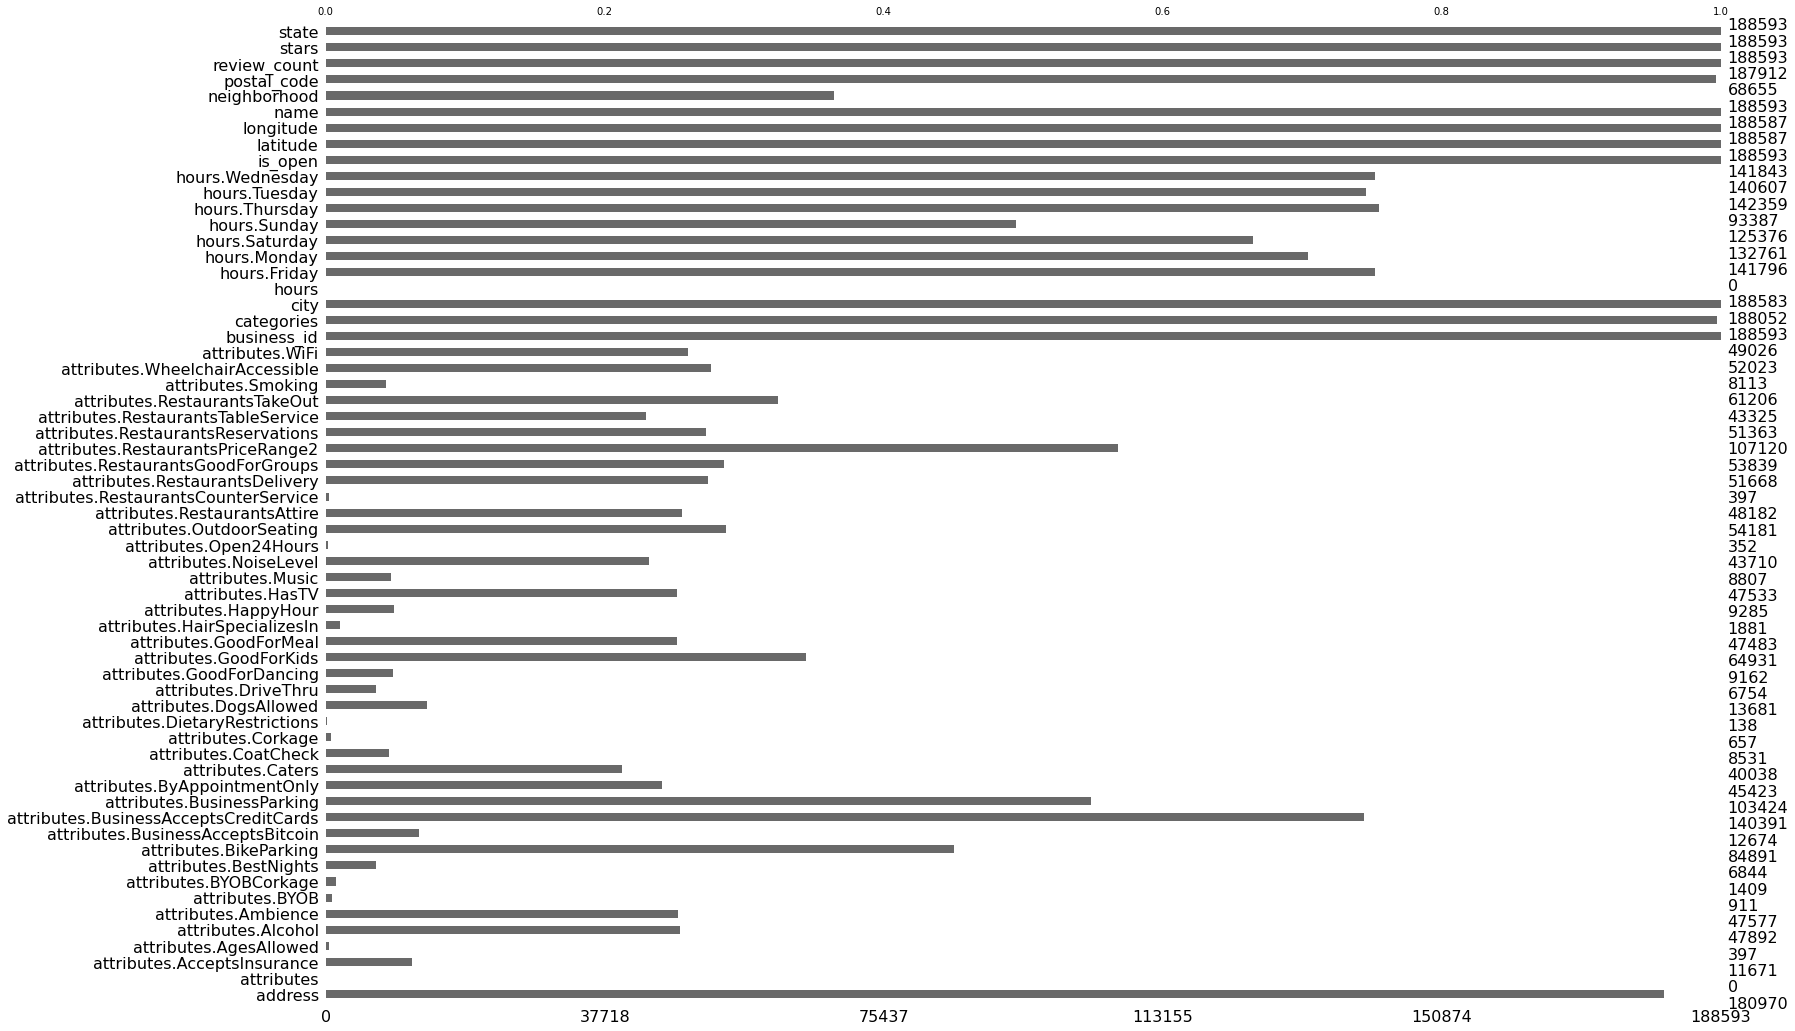

In [10]:
# Use a heatmap, pointplot, or other appropriate visualization here
msno.bar(business_data)


### Problem 5: (5 points)

<span  style="color:purple; font-size:16px">Drop all columns that contain **only missing values** from `business_data`.</span>

In [11]:
# Your code here
business_data=business_data.dropna(axis=1,how='all')
business_data.isnull().all()

address                                  False
attributes.AcceptsInsurance              False
attributes.AgesAllowed                   False
attributes.Alcohol                       False
attributes.Ambience                      False
attributes.BYOB                          False
attributes.BYOBCorkage                   False
attributes.BestNights                    False
attributes.BikeParking                   False
attributes.BusinessAcceptsBitcoin        False
attributes.BusinessAcceptsCreditCards    False
attributes.BusinessParking               False
attributes.ByAppointmentOnly             False
attributes.Caters                        False
attributes.CoatCheck                     False
attributes.Corkage                       False
attributes.DietaryRestrictions           False
attributes.DogsAllowed                   False
attributes.DriveThru                     False
attributes.GoodForDancing                False
attributes.GoodForKids                   False
attributes.Go

### Problem 6: (5 points)

<span  style="color:purple; font-size:16px">The `business_data` is not in a form that is convenient for analysis. Let's begin by cleaning up the variable names. </span>

Tasks:

1. Make all column names lowercase.
1. Replace all periods `.` with an underscore _

In [12]:
# ignoring the warnings 
import warnings
warnings.filterwarnings("ignore")

In [13]:
# Your code here

business_data= business_data.rename(columns=str.lower)
business_data.columns = business_data.columns.str.replace(".", "_")
business_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188593 entries, 0 to 188592
Data columns (total 59 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   address                                180970 non-null  object 
 1   attributes_acceptsinsurance            11671 non-null   object 
 2   attributes_agesallowed                 397 non-null     object 
 3   attributes_alcohol                     47892 non-null   object 
 4   attributes_ambience                    47577 non-null   object 
 5   attributes_byob                        911 non-null     object 
 6   attributes_byobcorkage                 1409 non-null    object 
 7   attributes_bestnights                  6844 non-null    object 
 8   attributes_bikeparking                 84891 non-null   object 
 9   attributes_businessacceptsbitcoin      12674 non-null   object 
 10  attributes_businessacceptscreditcards  140391 non-null  

### Problem 7: (5 points)

<span  style="color:purple; font-size:16px">Let's now get rid of columns that we don't need right now. Perform the following transformation steps to the data.</span>

1. Drop all `attribute_*` columns except for the `attributes_happyhour` column.
1. Create a new column, called `open_on_weekends`, that is a 1 if the business is open on the weekend (has a non-null value for either `hours_saturday` or `hours_sunday`) and 0 otherwise.
1. Drop all of the `hours_*` columns after creating the `open_on_weekends` column.

In [14]:
# Drop all of the unwanted attributes columns
drop_columns = [col for col in business_data if 'attributes_' in col and col!='attributes_happyhour']
business_data.drop(columns=drop_columns, inplace=True)
business_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188593 entries, 0 to 188592
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   address               180970 non-null  object 
 1   attributes_happyhour  9285 non-null    object 
 2   business_id           188593 non-null  object 
 3   categories            188052 non-null  object 
 4   city                  188583 non-null  object 
 5   hours_friday          141796 non-null  object 
 6   hours_monday          132761 non-null  object 
 7   hours_saturday        125376 non-null  object 
 8   hours_sunday          93387 non-null   object 
 9   hours_thursday        142359 non-null  object 
 10  hours_tuesday         140607 non-null  object 
 11  hours_wednesday       141843 non-null  object 
 12  is_open               188593 non-null  int64  
 13  latitude              188587 non-null  float64
 14  longitude             188587 non-null  float64
 15  

In [15]:
business_data.head()

,address,attributes_happyhour,business_id,categories,city,hours_friday,hours_monday,hours_saturday,hours_sunday,hours_thursday,hours_tuesday,hours_wednesday,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,1314 44 Avenue NE,NaN,Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Ho...",Calgary,11:0-21:0,8:30-17:0,11:0-21:0,NaN,11:0-21:0,11:0-21:0,11:0-21:0,1,51.091813,-114.031675,Minhas Micro Brewery,NaN,T2E 6L6,24,4.0,AB
1,NaN,NaN,AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendo...",Henderson,17:0-23:0,NaN,17:0-23:0,17:0-23:0,NaN,NaN,NaN,0,35.960734,-114.939821,CK'S BBQ & Catering,NaN,89002,3,4.5,NV
2,1335 rue Beaubien E,NaN,O8S5hYJ1SMc8fA4QBtVujA,"Breakfast & Brunch, Restaurants, French, Sandw...",Montréal,10:0-22:0,10:0-22:0,10:0-22:0,10:0-22:0,10:0-22:0,10:0-22:0,10:0-22:0,0,45.540503,-73.599300,La Bastringue,Rosemont-La Petite-Patrie,H2G 1K7,5,4.0,QC
3,211 W Monroe St,NaN,bFzdJJ3wp3PZssNEsyU23g,"Insurance, Financial Services",Phoenix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,33.449999,-112.076979,Geico Insurance,NaN,85003,8,1.5,AZ
4,2005 Alyth Place SE,NaN,8USyCYqpScwiNEb58Bt6CA,"Home & Garden, Nurseries & Gardening, Shopping...",Calgary,8:0-17:0,8:0-17:0,NaN,NaN,8:0-17:0,8:0-17:0,8:0-17:0,1,51.035591,-114.027366,Action Engine,NaN,T2H 0N5,4,2.0,AB


In [16]:
# Create open_on_weekends
def create_col(row):
    if row['hours_saturday']!= "NaN" or row['hours_sunday'] !="NaN":
        val = 1
    else:
        val= 0

    return val

business_data['open_on_weekends'] = business_data.apply(create_col, axis=1)
business_data.head()

,address,attributes_happyhour,business_id,categories,city,hours_friday,hours_monday,hours_saturday,hours_sunday,hours_thursday,hours_tuesday,hours_wednesday,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state,open_on_weekends
0,1314 44 Avenue NE,NaN,Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Ho...",Calgary,11:0-21:0,8:30-17:0,11:0-21:0,NaN,11:0-21:0,11:0-21:0,11:0-21:0,1,51.091813,-114.031675,Minhas Micro Brewery,NaN,T2E 6L6,24,4.0,AB,1
1,NaN,NaN,AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendo...",Henderson,17:0-23:0,NaN,17:0-23:0,17:0-23:0,NaN,NaN,NaN,0,35.960734,-114.939821,CK'S BBQ & Catering,NaN,89002,3,4.5,NV,1
2,1335 rue Beaubien E,NaN,O8S5hYJ1SMc8fA4QBtVujA,"Breakfast & Brunch, Restaurants, French, Sandw...",Montréal,10:0-22:0,10:0-22:0,10:0-22:0,10:0-22:0,10:0-22:0,10:0-22:0,10:0-22:0,0,45.540503,-73.599300,La Bastringue,Rosemont-La Petite-Patrie,H2G 1K7,5,4.0,QC,1
3,211 W Monroe St,NaN,bFzdJJ3wp3PZssNEsyU23g,"Insurance, Financial Services",Phoenix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,33.449999,-112.076979,Geico Insurance,NaN,85003,8,1.5,AZ,1
4,2005 Alyth Place SE,NaN,8USyCYqpScwiNEb58Bt6CA,"Home & Garden, Nurseries & Gardening, Shopping...",Calgary,8:0-17:0,8:0-17:0,NaN,NaN,8:0-17:0,8:0-17:0,8:0-17:0,1,51.035591,-114.027366,Action Engine,NaN,T2H 0N5,4,2.0,AB,1


In [17]:
# Remove hours.* columns
drop_columns = [col for col in business_data if 'hours_' in col]
print("dopping columns =", drop_columns)
business_data.drop(columns=drop_columns, inplace=True)
business_data.info()

dopping columns = ['hours_friday', 'hours_monday', 'hours_saturday', 'hours_sunday', 'hours_thursday', 'hours_tuesday', 'hours_wednesday']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188593 entries, 0 to 188592
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   address               180970 non-null  object 
 1   attributes_happyhour  9285 non-null    object 
 2   business_id           188593 non-null  object 
 3   categories            188052 non-null  object 
 4   city                  188583 non-null  object 
 5   is_open               188593 non-null  int64  
 6   latitude              188587 non-null  float64
 7   longitude             188587 non-null  float64
 8   name                  188593 non-null  object 
 9   neighborhood          68655 non-null   object 
 10  postal_code           187912 non-null  object 
 11  review_count          188593 non-null  int64  
 12  stars            

### Problem 8: (5 points)

<span  style="color:purple; font-size:16px">Create a Pandas Series containing the proportion of business in the data by state. (For now, a *state* refers to any level of the `state` variable, not only states in the U.S.A.)</span>

In [18]:
# Number of businesses by state
no_of_business=business_data["state"].value_counts()
no_of_business

AZ     56495
NV     35688
ON     32393
NC     14359
OH     13664
PA     10966
QC      8756
AB      7670
WI      5042
IL      1937
SC       770
NYK      163
NI       134
IN       101
OR        72
BY        60
ST        45
CO        43
C         34
HE        32
XGM       23
NLK       23
RP        19
NY        19
01        11
CA         8
VS         7
NW         4
O          3
6          3
G          2
VT         2
B          2
MO         2
M          2
AR         2
CMA        2
WA         2
SG         2
AL         2
WHT        1
GA         1
AG         1
XMS        1
CS         1
MA         1
11         1
V          1
BC         1
SP         1
DE         1
HH         1
TAM        1
NE         1
CC         1
CRF        1
KY         1
FL         1
HU         1
WAR        1
PO         1
MT         1
LU         1
45         1
10         1
4          1
RCC        1
VA         1
MN         1
Name: state, dtype: int64

In [19]:
# Number of businesses by state
state_proportion = business_data["state"].value_counts() * 100 / business_data.shape[0]
print(state_proportion.shape)
state_proportion

(69,)


AZ     29.956043
NV     18.923290
ON     17.176141
NC      7.613750
OH      7.245232
PA      5.814638
QC      4.642802
AB      4.066959
WI      2.673482
IL      1.027079
SC      0.408287
NYK     0.086430
NI      0.071052
IN      0.053554
OR      0.038177
BY      0.031815
ST      0.023861
CO      0.022800
C       0.018028
HE      0.016968
XGM     0.012196
NLK     0.012196
RP      0.010075
NY      0.010075
01      0.005833
CA      0.004242
VS      0.003712
NW      0.002121
O       0.001591
6       0.001591
G       0.001060
VT      0.001060
B       0.001060
MO      0.001060
M       0.001060
AR      0.001060
CMA     0.001060
WA      0.001060
SG      0.001060
AL      0.001060
WHT     0.000530
GA      0.000530
AG      0.000530
XMS     0.000530
CS      0.000530
MA      0.000530
11      0.000530
V       0.000530
BC      0.000530
SP      0.000530
DE      0.000530
HH      0.000530
TAM     0.000530
NE      0.000530
CC      0.000530
CRF     0.000530
KY      0.000530
FL      0.000530
HU      0.0005

<span  style="color:purple; font-size:16px">How many unique states are represented in the data? Are all of them in the United States of America? Do all of the levels of `state` make sense?</span>

#### Written Answer:

- There are 69 unique states represented in the data.

- No, not all the states are from USA. Some states like ON, QC etc. appear to be from Canada. Also, some states like RCC, WAR etc. with three letters may be from other countries. 

- No, there are some state identifiers as integer numbers like 11, 45, 10 and 4 as well as single letters like O, G, B, M etc. that do not make sense.


### Problem 9: (5 points)

<span  style="color:purple; font-size:16px">These data are fairly large! Let's focus on the data from a few key states. The goal in this exercise is to subset `business_data` to only contain businesses in the 5 states having the largest total number of businesses in the state. (Again, *state* does not need to correspond to a state in the U.S.A. but simply refers to a level of the `state` column.)</span>

Tasks:

1. Extract the 5 states from `state_counts` with the largest number of businesses
2. Subset `business_data` to only contain observations from these top-5 states

In [20]:
# Your code here
top5_states = no_of_business.index[:5]
business_data = business_data[business_data["state"].isin(top5_states)]
business_data["state"].value_counts()

AZ    56495
NV    35688
ON    32393
NC    14359
OH    13664
Name: state, dtype: int64

### Problem 10:  (5 points)

<span  style="color:purple; font-size:16px">Import the `territory_abbr.csv` data which contains a record for every U.S. state and territory. Use this data to **remove** businesses outside of the United States *by* performing an appropriate **merge** with `business_data`. Assign the remaining data to a DataFrame called `business_data_subset`.</span>

(Of course...you could probably figure out what state(s) need to be removed just by looking at them. The point is to demonstrate that you can use `merge()` and any necessary arguments to accomplish the task. Also...don't mess up your tidy data! Though not necessary for full credit, you may want to remove/modify columns that are not lowercase.)

In [21]:
# Read in data

us_data = pd.read_csv('territory_abbr.csv')
us_data.head()

,State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [22]:
# Your code here
business_data_subset = business_data.merge(us_data, how='inner', left_on='state', right_on='Abbreviation')
business_data_subset['state'].value_counts()

AZ    56495
NV    35688
NC    14359
OH    13664
Name: state, dtype: int64

In [23]:
business_data_subset.head()

,address,attributes_happyhour,business_id,categories,city,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state,open_on_weekends,State,Abbreviation
0,NaN,NaN,AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendo...",Henderson,0,35.960734,-114.939821,CK'S BBQ & Catering,NaN,89002,3,4.5,NV,1,Nevada,NV
1,703 N Rancho Dr,NaN,hTzcHtk4-0QJnFUbkKpd5Q,"Shopping, Fashion, Department Stores",Las Vegas,1,36.178348,-115.176916,Citi Trends,NaN,89106,4,4.0,NV,1,Nevada,NV
2,1549 N Rancho Dr,NaN,UwIpS9UKsPiKAv1fiEYhqg,"Financial Services, Check Cashing/Pay-day Loan...",Las Vegas,1,36.188386,-115.186124,Nevada Title And Payday Loans,NaN,89106,4,1.0,NV,1,Nevada,NV
3,"3940 Martin Luther King Blvd, Ste 101",NaN,vJIuDBdu01vCA8y1fwR1OQ,"American (Traditional), Food, Bakeries, Restau...",Las Vegas,0,36.192284,-115.159272,CakesbyToi,NaN,89106,3,1.5,NV,1,Nevada,NV
4,NaN,NaN,YZCHr68c5aEVHz0bkq9K2g,"Home Services, Masonry/Concrete, Professional ...",Las Vegas,1,36.260816,-115.171130,Park Stone Pavers,NaN,89031,20,5.0,NV,1,Nevada,NV


In [24]:
business_data_subset = business_data_subset.drop(labels=['State','Abbreviation'], axis=1)
business_data_subset.head()

,address,attributes_happyhour,business_id,categories,city,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state,open_on_weekends
0,NaN,NaN,AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendo...",Henderson,0,35.960734,-114.939821,CK'S BBQ & Catering,NaN,89002,3,4.5,NV,1
1,703 N Rancho Dr,NaN,hTzcHtk4-0QJnFUbkKpd5Q,"Shopping, Fashion, Department Stores",Las Vegas,1,36.178348,-115.176916,Citi Trends,NaN,89106,4,4.0,NV,1
2,1549 N Rancho Dr,NaN,UwIpS9UKsPiKAv1fiEYhqg,"Financial Services, Check Cashing/Pay-day Loan...",Las Vegas,1,36.188386,-115.186124,Nevada Title And Payday Loans,NaN,89106,4,1.0,NV,1
3,"3940 Martin Luther King Blvd, Ste 101",NaN,vJIuDBdu01vCA8y1fwR1OQ,"American (Traditional), Food, Bakeries, Restau...",Las Vegas,0,36.192284,-115.159272,CakesbyToi,NaN,89106,3,1.5,NV,1
4,NaN,NaN,YZCHr68c5aEVHz0bkq9K2g,"Home Services, Masonry/Concrete, Professional ...",Las Vegas,1,36.260816,-115.171130,Park Stone Pavers,NaN,89031,20,5.0,NV,1


<span  style="color:purple; font-size:16px">How many unique U.S. states are left in the data?</span>

In [25]:
# Your code here
print("Number of unique U.S. states left in the data =", business_data_subset['state'].unique().shape[0])

Number of unique U.S. states left in the data = 4


## Task Set #2 - Analysis

---

### Problem 11: (5 points)

<span  style="color:purple; font-size:16px">Do businesses with more reviews tend to have higher ratings? </span> 

<span  style="color:purple; font-size:16px">To help answer this question, use `business_data` to create *side-by-side notched boxplots* to visualize the relationship between the number of reviews left for the business (`review_count`, y-axis) and the rating of the business (`stars`, x-axis).</span> 
    
<span  style="color:purple; font-size:16px">**Note: use `ax.set_yscale('log')` to set the scale of the y-axis to be logarithmic due to extreme variation in the number of reviews left for the businesses. This means you must specify a figure and axes object using `fig, ax = plt.subplots(figsize=(10, 10))`**</span>
    
<span>Make sure to use appropriate axes labels and include an appropriate title. Make the figure 10 units tall and 10 units wide.</span>

Text(0, 0.5, 'Review Count')

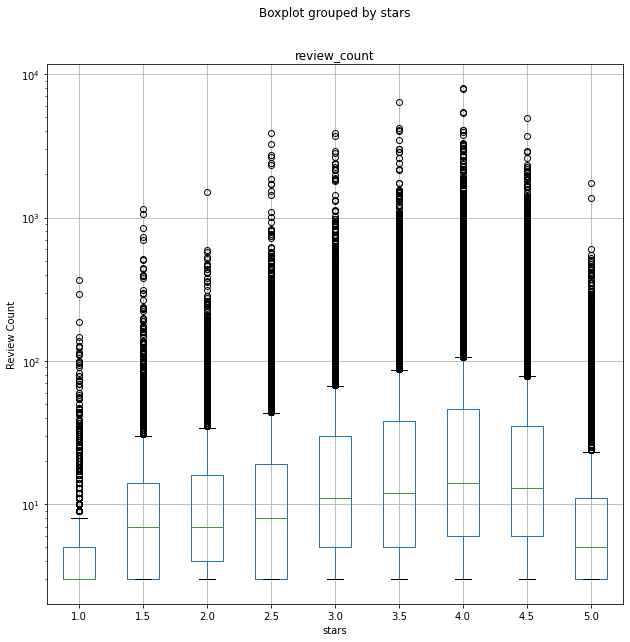

In [26]:
# Your code here
ax = business_data.boxplot(column='review_count', by='stars', figsize=(10, 10))
ax.set_yscale('log')
ax.set_ylabel('Review Count')

<span  style="color:purple; font-size:16px">Describe what you see in the plot and formulate a hypothesis about why the relationship between these variables looks the way it does.</span>

#### Written Answer:

> Businesses with more reviews do not necessarily tend to have higher ratings. Because if we see the graph review_counts for stars 4 is the highest and after that review_count decreases for stars 4.5 and 5. Which shows that a high review_count has an average rating either 3.5 or 4.


### Problem 12: (5 points)

<span  style="color:purple; font-size:16px">The `categories` column of `business_data_subset` contains a *comma separated* list of various keyword categories for each business. Use an appropriate Python data structure to iterate over every row of the data and determine all of the unique categories as well as the number of times each category appears, sorted from most common category to least common category.</span>

Your result should look like the following:

<pre>
Restaurants                  234
Shopping                     173
Home Services                132
Food                         120
Health & Medical              92
.
.
.

In [27]:
# Your code here
categories = {}
for i in business_data_subset['categories']:
    l = str(i).split(sep=",")
    for j in l:
        c = j.strip()
        c = c.lower()
        if not c in categories:
            categories[c] = 1
        else:
            categories[c] += 1

for w in sorted(categories, key=categories.get, reverse=True):
    print("%-35s %10d"%(w, categories[w]))

restaurants                              27708
shopping                                 19978
home services                            15731
food                                     14051
beauty & spas                            12980
health & medical                         12934
local services                            9901
automotive                                9505
nightlife                                 6825
event planning & services                 6359
active life                               6251
bars                                      5808
professional services                     4759
fashion                                   4731
doctors                                   4731
hair salons                               4633
real estate                               4624
fast food                                 4442
american (traditional)                    4331
home & garden                             4220
auto repair                               4203
sandwiches   

<span  style="color:purple; font-size:16px">How many distinct categories are in `business_data_subset`?</span>

In [28]:
# Number of distinct categories equal to the number of rows

print("Number of distinct categories in dataset =", len(categories))

Number of distinct categories in dataset = 1261


### Problem 13: (5 points)

<span  style="color:purple; font-size:16px">For this question, we want to see if we can use the `categories` variable from the `business_data_subset` table to extract the records belonging to **food establishments** - any place that someone could go to get a freshly prepared meal.</span>

<span  style="color:purple; font-size:16px">Create a copy of the Pandas DataFrame called `food_establishments` which contains all business in `business_data_subset` that contain either *dining* or *restaurant* in their list of categories. (Make sure to ignore case.) How many food establishments are captured using this method?</span>

Hint: This can be accomplished in at least two ways. No reasonable method is bad! Create a new variable and use it to filter observations or directly subset the data. Your choice!

In [29]:
# Your code here
l = ['dining', 'restaurant', 'restaurants']
items = []
for i,c in enumerate(business_data_subset['categories']):
    s = str(c).split(",")
    for j in s:
        ss = j.strip()
        ss = ss.lower()
#         print(ss)
        if ss in l:
            items.append(i)
    
food_establishments = business_data_subset.filter(items=items, axis=0)
food_establishments = food_establishments.reset_index()
food_establishments.head()


,index,address,attributes_happyhour,business_id,categories,city,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state,open_on_weekends
0,0,NaN,NaN,AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendo...",Henderson,0,35.960734,-114.939821,CK'S BBQ & Catering,NaN,89002,3,4.5,NV,1
1,3,"3940 Martin Luther King Blvd, Ste 101",NaN,vJIuDBdu01vCA8y1fwR1OQ,"American (Traditional), Food, Bakeries, Restau...",Las Vegas,0,36.192284,-115.159272,CakesbyToi,NaN,89106,3,1.5,NV,1
2,5,2255 N Rampart Blvd,NaN,kgffcoxT6BQp-gJ-UQ7Czw,"Fast Food, Restaurants, Sandwiches",Las Vegas,1,36.201794,-115.281981,Subway,Summerlin,89128,13,2.5,NV,1
3,6,2227 N Rampart Blvd,NaN,0jtRI7hVMpQHpUVtUy4ITw,"Beer, Wine & Spirits, Italian, Food, American ...",Las Vegas,1,36.201990,-115.283122,Omelet House Summerlin,Summerlin,89128,242,4.0,NV,1
4,12,7930 W Tropical Pkwy,NaN,JJEx5wIqs9iGGATOagE8Sg,"Mexican, Restaurants",Las Vegas,0,36.271169,-115.267759,Baja Fresh Mexican Grill,Centennial,89149,4,2.0,NV,1


In [30]:
food_establishments.shape

(27708, 16)

### Problem 14: (5 points)

<span  style="color:purple; font-size:16px">Using the `food_establishments` table, create a table with `stars` as the index, `state` as the columns, and the conditional `stars` distribution of food establishments for each `state` as values.</span>

<span  style="color:purple; font-size:16px">Include the marginal `stars` distribution in your table by using the appropriate `margins` argument. Create a valid conditional `stars` distribution for each state using the `normalize = 'columns'` argument.</span>

You can check that you have successfully create valid conditional `stars` distributions for each state by verifying each column sums to 1. 

Your final table should look similar to the table below with the appropriate values imputed for `val`.

| state  	|  AZ 	| NV  	| NC  	| OH  | All |
|---	|---	|---	|---	|---  |---  |
|   stars 	|
|   1 	|   val	|  val 	|  val 	| val   | val    |
|   1.5	|   val	|  val	|  val 	| val   | val    |
|   2	|   val	|  val 	|  val 	| val   | val    |
|   2.5	|   val	|  val	|  val 	| val   | val    |
|   3	|   val	|  val 	|  val 	| val   | val    |
|   3.5	|   val	|  val	|  val 	| val   | val    |
|   4	|   val	|  val 	|  val 	| val   | val    |
|   4.5	|   val	|  val 	|  val 	| val   | val    |
|   5	|   val	|  val 	|  val 	| val   | val    |

In [31]:
# Your code here

stars_states=pd.crosstab(index=food_establishments['stars'], columns=food_establishments['state'],
                         dropna=False,margins=True, normalize="columns")
stars_states

state,AZ,NC,NV,OH,All
stars,,,,,
1.0,0.006142,0.009121,0.003768,0.012701,0.007146
1.5,0.024296,0.030005,0.022877,0.026196,0.025119
2.0,0.064216,0.062170,0.062576,0.061520,0.062978
2.5,0.107659,0.106817,0.103755,0.109149,0.106756
3.0,0.176120,0.183389,0.166061,0.167494,0.172946
3.5,0.232930,0.235478,0.237115,0.237150,0.235203
4.0,0.248103,0.234998,0.246400,0.240524,0.244298
4.5,0.114704,0.111858,0.127035,0.118674,0.118305
5.0,0.025831,0.026164,0.030413,0.026593,0.027248


In [32]:
stars_states.sum()

state
AZ     1.0
NC     1.0
NV     1.0
OH     1.0
All    1.0
dtype: float64

### Problem 15: (5 points)

<span  style="color:purple; font-size:16px">Is there a difference in the rating distribution (`stars`) of food establishments by state?</span>

<span  style="color:purple; font-size:16px">Use the table you created in the previous problem to create an appropriate visualization that helps you to answer the above question.</span>

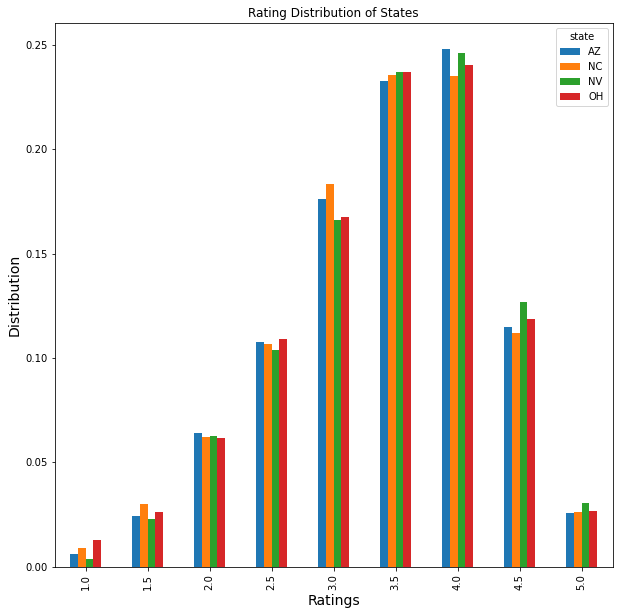

In [33]:
# Your code here
stars_states_new= stars_states.iloc[: , :-1]
ax=stars_states_new.plot(kind='bar', stacked=False,figsize=(10, 10), title='Rating Distribution of States')
ax.set_xlabel("Ratings", fontsize=14)
ax.set_ylabel('Distribution', fontsize=14)

plt.show()

> To answer the question, is there a difference in the rating distribution (stars) of food establishments by state? I have plotted the above graph. I don't see much of difference in by state. Highest average rating for all the states is 3.5 or 4 and lowest is either 1 or 5. There is no significant difference. 

### Problem 16: (5 points)

<span  style="color:purple; font-size:16px">Using the `food_establishments` data, calculate the *median*, *mean*, *standard deviation*, *minimum*, *maximum*, and *number of observations* for food establishments with/without a *Happy Hour* by using the `attributes_happyhour` variable.</span>

In [34]:
# Your code here

food_establishments.groupby('attributes_happyhour').describe().T

attributes_happyhour            False           True
index            count     435.000000    3057.000000
                 mean    75684.556322   67421.089957
                 std     39084.433671   34370.117791
                 min       199.000000      51.000000
                 25%     34451.000000   37119.000000
                 50%     94042.000000   73368.000000
                 75%    110714.000000   97882.000000
                 max    119914.000000  120170.000000
is_open          count     435.000000    3057.000000
                 mean        0.747126       0.743212
                 std         0.435160       0.436933
                 min         0.000000       0.000000
                 25%         0.000000       0.000000
                 50%         1.000000       1.000000
                 75%         1.000000       1.000000
                 max         1.000000       1.000000
latitude         count     435.000000    3057.000000
                 mean       35.961422      36.181000
                 std         2.390157       3.093478
                 min        33.285528      33.180485
                 25%        35.104403      33.508891
                 50%        35.273211      35.258083
                 75%        36.121454      36.238834
                 max        41.754768      41.758134
longitude        count     435.000000    3057.000000
                 mean      -96.915387    -102.002673
                 std        16.408533      15.217708
                 min      -115.332975    -115.644741
                 25%      -115.110329    -112.356724
                 50%       -81.893156    -111.924962
                 75%       -80.848560     -81.704330
                 max       -80.546226     -80.515255
review_count     count     435.000000    3057.000000
                 mean      177.542529     161.087341
                 std       338.276705     252.562845
                 min         3.000000       3.000000
                 25%        26.000000      31.000000
                 50%        64.000000      78.000000
                 75%       177.500000     188.000000
                 max      3975.000000    3048.000000
stars            count     435.000000    3057.000000
                 mean        3.678161       3.505561
                 std         0.655432       0.620838
                 min         1.500000       1.000000
                 25%         3.500000       3.000000
                 50%         4.000000       3.500000
                 75%         4.000000       4.000000
                 max         5.000000       5.000000
open_on_weekends count     435.000000    3057.000000
                 mean        1.000000       1.000000
                 std         0.000000       0.000000
                 min         1.000000       1.000000
                 25%         1.000000       1.000000
                 50%         1.000000       1.000000
                 75%         1.000000       1.000000
                 max         1.000000       1.000000

In [35]:
food_establishments.groupby('attributes_happyhour').median()


,index,is_open,latitude,longitude,review_count,stars,open_on_weekends
attributes_happyhour,,,,,,,
False,94042.0,1.0,35.273211,-81.893156,64.0,4.0,1.0
True,73368.0,1.0,35.258083,-111.924962,78.0,3.5,1.0


<span  style="color:purple; font-size:16px">Describe any differences you find for food establishments having a *Happy Hour* and those that do not. Do food establishments with a happy hour seem to typically be higher or lower rated than food establishments without a happy hour? Do most food establishments offer a happy hour?</span>

#### Written Answer:

> From the above output we can say that there are 3057 and  435 food establishments who do and do not offer happy hours respectively. There is not much of a difference between ratings for food establishments with and without happy hours.


### Problem 17: (5 points)

<span  style="color:purple; font-size:16px">Let's investigate differences in food establishments with/without a Happy Hour using an appropriate visualization.</span>
    
<span  style="color:purple; font-size:16px">First, create a new variable for the `food_establishments` table called `binned_review_count` that bins the `review_count` variable as: 
    
 + '[0-10]' = having between 0 and 10 reviews inclusive
 + '(10,100]' = having between 10 and 100 reviews
 + '(100,1,000]' = having between 100 and 1,000 reviews
 + '1,000 +` = more than one thousand reviews.
</span>

<span  style="color:purple; font-size:16px">Create a side-by-side violin plot with `binned_review_count` on the y-axis, `stars` on the x-axis, and allow the rating distributions to differ for establishments **with and without a Happy Hour** by using the `split = True` argument. As always, provide an appropriate title and axes labels.</span>

In [36]:
# Your code here


conditions = [
    (food_establishments['review_count'] >= 0)& (food_establishments['review_count'] <= 10) ,
    (food_establishments['review_count'] > 10)& (food_establishments['review_count'] <= 100),
    (food_establishments['review_count'] > 100)& (food_establishments['review_count'] <= 1000),
    (food_establishments['review_count'] > 1000)
    ]
values=['[0-10]','(10,100]','(100,1,000]','1,000 +']
food_establishments['binned_review_count'] = np.select(conditions, values)
food_establishments.head()

,index,address,attributes_happyhour,business_id,categories,city,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state,open_on_weekends,binned_review_count
0,0,NaN,NaN,AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendo...",Henderson,0,35.960734,-114.939821,CK'S BBQ & Catering,NaN,89002,3,4.5,NV,1,[0-10]
1,3,"3940 Martin Luther King Blvd, Ste 101",NaN,vJIuDBdu01vCA8y1fwR1OQ,"American (Traditional), Food, Bakeries, Restau...",Las Vegas,0,36.192284,-115.159272,CakesbyToi,NaN,89106,3,1.5,NV,1,[0-10]
2,5,2255 N Rampart Blvd,NaN,kgffcoxT6BQp-gJ-UQ7Czw,"Fast Food, Restaurants, Sandwiches",Las Vegas,1,36.201794,-115.281981,Subway,Summerlin,89128,13,2.5,NV,1,"(10,100]"
3,6,2227 N Rampart Blvd,NaN,0jtRI7hVMpQHpUVtUy4ITw,"Beer, Wine & Spirits, Italian, Food, American ...",Las Vegas,1,36.201990,-115.283122,Omelet House Summerlin,Summerlin,89128,242,4.0,NV,1,"(100,1,000]"
4,12,7930 W Tropical Pkwy,NaN,JJEx5wIqs9iGGATOagE8Sg,"Mexican, Restaurants",Las Vegas,0,36.271169,-115.267759,Baja Fresh Mexican Grill,Centennial,89149,4,2.0,NV,1,[0-10]


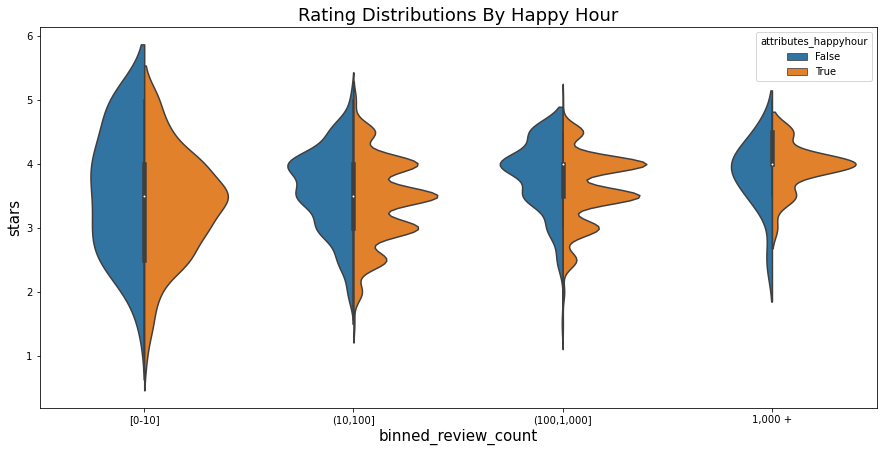

In [37]:
import seaborn as sns
plt.figure(figsize=(15,7))
ax = sns.violinplot(x=food_establishments['binned_review_count'],
                    y=food_establishments['stars'], 
                    hue=food_establishments['attributes_happyhour'], split=True)
ax.set_title("Rating Distributions By Happy Hour", fontsize=18)
ax.set_ylabel("stars", fontsize=15)
ax.set_xlabel("binned_review_count", fontsize=15)
plt.show()

Describe what you see in the plot.

#### Written Answer:

> First thing we notice from the graph is these is drease is number of stars as we go from group 0-10 to 1000+ review counts respectively. Also businesses having happy hours have a higher number of ratings than the businesses who don't have happy hours. 

### Problem 18: (5 points)

<span  style="color:purple; font-size:16px">Suppose you work at Yelp. You have been tasked with a new initiative to create a new award for the highest performing food establishments represented on the Yelp platform. The team at Yelp has determined that any food establishment that has both the highest `stars` rating **AND** the largest total number of reviews (`review_count`) in their city *deserves* the **Best Local Food Establishment Award**. You have been tasked with writing Python code that can determine which food establishments in a data set deserve this new prestigious award.</span>

<span  style="color:purple; font-size:16px">For this exercise, create a DataFrame containing all the food establishments in the `food_establishments` data that deserve **Best Local Food Establishment Award** for every city/state combination (to avoid issues with cities that have the same name). The final table that you are to create, called `best_food_establishments`, should provide the `name`, `city`, `state`, `review_count`, and `stars` ratings of all of the food establishments that deserve the award.</span>

Important Notes: There are some slight variations in some city names like: LasVegas, Las Vegas, las vegas. You do not need to worry about cleaning this up before performing your analysis, this is really a proof-of-concept for your team. Also, some cities will have no food establishments that deserve to receive this award as it is possible that the food establishment with the largest number of reviews **does not** have the highest rating in the city.

In [38]:
# Your code here

# Doing groupby state and city and then getting max value from review_count and stars column

nom_table=food_establishments.groupby(['state','city']).agg(review_count_max = ('review_count', 'max'),
                                                 star_max=('stars',max))
nom_table.head()

review_count_max  star_max
state city                                 
AZ    Ahwatukee               283       4.0
      Anthem                  257       4.5
      Avondale                668       5.0
      Buckeye                 169       5.0
      Carefree                229       4.5

In [39]:
# Creating a temp Datafram from above groupby output which will be used to compare the values and extract.

state=[]
city=[]
review_count_max=[]
star_max=[]
for i,rows in nom_table.iterrows():
    list1=list(i)
    state.append(list1[0])
    city.append(list1[1])
        
    review_count_max.append(rows['review_count_max'])
    star_max.append(rows['star_max'])
    
name_dict={'State': state, 'City':city, 'Review_count_max': review_count_max, 'Star_max': star_max}
temp_df = pd.DataFrame(name_dict)
temp_df.head()

,State,City,Review_count_max,Star_max
0,AZ,Ahwatukee,283.0,4.0
1,AZ,Anthem,257.0,4.5
2,AZ,Avondale,668.0,5.0
3,AZ,Buckeye,169.0,5.0
4,AZ,Carefree,229.0,4.5


In [40]:
#Extracting the row only if review_count and stars matches the max review_count and max stars

inter_df= pd.DataFrame()

for i,r in temp_df.iterrows():
    row =food_establishments.loc[(food_establishments['state']== r['State'])& 
                                 (food_establishments['city']==r['City'])&
                                (food_establishments['review_count']==r['Review_count_max'])& 
                                     (food_establishments['stars']==r['Star_max'])]
    inter_df = inter_df.append(row, ignore_index = True)


In [41]:
best_food_establishments=inter_df[['name', 'city', 'state','review_count', 'stars']].copy()

In [42]:
best_food_establishments

,name,city,state,review_count,stars
0,Cupz N' Crepes,Ahwatukee,AZ,283,4.0
1,Wendy's,Central City,AZ,8,3.0
2,Cheuvront Restaurant,Central City Village,AZ,13,3.0
3,Ellas Tavern,Gelndale,AZ,9,3.0
4,Hot Bagels & Deli,Glendale Az,AZ,97,3.5
5,Mugsy Dogs,Higley,AZ,158,4.0
6,Jack in the Box,Mesa AZ,AZ,14,3.0
7,Fatburger,Pheonix,AZ,12,3.5
8,Louisiana Fried Chicken,Pheonix AZ,AZ,11,3.5
9,Desert Finds,Phoenix Valley,AZ,4,2.0


### Problem 19: (10 points)

<span  style="color:purple; font-size:16px">Subsequent questions involve the `yelp_academic_dataset_review.csv` data. Let's investigate the relationship between the data for businesses remaining in `business_data` (we subset the data in a previous problem, you can use it as is) and the `yelp_academic_dataset_review.csv` data. One thing that would interesting to know is, does it appear that we have all the reviews for each business? For example: if we see a business in `business_data` has 14 reviews, does the review table contain all 14 of those reviews?</span>

<span  style="color:purple; font-size:16px">To determine whether this is the case:
    
  + Import the `yelp_academic_dataset_review.csv` data.
  + Subset the reviews data to only contain records for businesses in the `business_data` table.
  + Use `groupby()` to get the counts of reviews for every unique business (by `business_id`) in the reviews data.
  + Perform an appropriate join to the `business_data` table to create a DataFrame containing three columns: 
      1. `business_id`
      1. `number_reviews` - the number of reviews for that particular business you found in the review table, 
      1. `review_count` - the number of reviews listed in the `food_establishments` table
  + Create a new column `abs_diff` containing the absolute value of the difference in the number of reviews for each business in `business_data` and number of reviews from the reviews table.
  + Create a plot that helps us see the extent of any disparities between the number of reviews in the review data and the number of reviews stated in the `business_id` table.
  + Use the `describe()` method to numerically describe the extent of any disparities between the number of reviews in the `review_data` and the number of reviews stated in the `business_id` table in the `review_count` field.
</span>

In [43]:
# Import the review data

review_data = pd.read_csv(r'yelp_academic_dataset_review.csv')
review_data

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,iCQpiavjjPzJ5_3gPD5Ebg,0,2011-02-25,0.0,x7mDIiDB3jEiPGPHOmDzyw,2.0,The pizza was okay. Not the best I've had. I p...,0.0,msQe1u7Z_XuqjGoqhB0J5g
1,pomGBqfbxcqPv14c3XH-ZQ,0,2012-11-13,0.0,dDl8zu1vWPdKGihJrwQbpw,5.0,I love this place! My fiance And I go here atl...,0.0,msQe1u7Z_XuqjGoqhB0J5g
2,jtQARsP6P-LbkyjbO1qNGg,1,2014-10-23,1.0,LZp4UX5zK3e-c5ZGSeo3kA,1.0,Terrible. Dry corn bread. Rib tips were all fa...,3.0,msQe1u7Z_XuqjGoqhB0J5g
3,elqbBhBfElMNSrjFqW3now,0,2011-02-25,0.0,Er4NBWCmCD4nM8_p1GRdow,2.0,Back in 2005-2007 this place was my FAVORITE t...,2.0,msQe1u7Z_XuqjGoqhB0J5g
4,Ums3gaP2qM3W1XcA5r6SsQ,0,2014-09-05,0.0,jsDu6QEJHbwP2Blom1PLCA,5.0,Delicious healthy food. The steak is amazing. ...,0.0,msQe1u7Z_XuqjGoqhB0J5g
...,...,...,...,...,...,...,...,...,...
5996993,abIF7pw1Hyu-eVW3LwNhyg,1,2016-02-29,0.0,ulyWlcLQ9CYleyh8lYOKVw,1.0,I must admit i have had very bad experience he...,0.0,LOUrYMvz-R0YPr0E80gk1A
5996994,fbLYRHIZAt3q839whhaBUg,0,2017-07-06,1.0,yPkClnqE7O7IibSuuswwrw,1.0,Worst service experience in awhile. I usually ...,0.0,FaAITTapZkngBDJus4niJQ
5996995,b_8jCti0vuouJ_fjZpdmZw,1,2018-04-14,0.0,ixnpFW4VZ3RFiOMSacg2ng,4.0,"Loved the location, the patio, the service, an...",0.0,FaAITTapZkngBDJus4niJQ
5996996,wY3dlpLa0BHfDENYAPYuZA,0,2018-04-07,0.0,UeLaZUk5TnqwUJ_uS6u-og,1.0,I absolutely hate this place. I would give it ...,0.0,NOrAsGtOH9BwPpcRWgo4-g


In [44]:
# Your code here
m = review_data.business_id.isin(business_data.business_id)
review_data = review_data[m]
review_data.shape

(5303821, 9)

In [45]:
# Getting review count from business_data

groupby_id_business=pd.DataFrame(business_data.groupby('business_id')['review_count'].sum())
groupby_id_business

,review_count
business_id,
--6MefnULPED_I942VcFNA,39
--7zmmkVg-IMGaXbuVd0SQ,54
--8LPVSo5i0Oo61X01sV9A,4
--9QQLMTbFzLJ_oT-ON3Xw,11
--9e1ONYQuAa-CB_Rrw7Tw,1546
...,...
zzuOCWxuY39YJ1wnTwQ0Lg,3
zzvlwkcNR1CCqOPXwuvz2A,5
zzwaS0xn1MVEPEf0hNLjew,68


In [46]:
# Getting review count from review_data

groupby_id_review=pd.DataFrame(review_data.groupby('business_id')['review_id'].count())
groupby_id_review

,review_id
business_id,
--6MefnULPED_I942VcFNA,39
--7zmmkVg-IMGaXbuVd0SQ,54
--8LPVSo5i0Oo61X01sV9A,4
--9QQLMTbFzLJ_oT-ON3Xw,11
--9e1ONYQuAa-CB_Rrw7Tw,1546
...,...
zzuOCWxuY39YJ1wnTwQ0Lg,3
zzvlwkcNR1CCqOPXwuvz2A,5
zzwaS0xn1MVEPEf0hNLjew,68


In [47]:
# merging both the columns

derived_df = groupby_id_business.merge(groupby_id_review, on='business_id', how='inner')
derived_df

,review_count,review_id
business_id,,
--6MefnULPED_I942VcFNA,39,39
--7zmmkVg-IMGaXbuVd0SQ,54,54
--8LPVSo5i0Oo61X01sV9A,4,4
--9QQLMTbFzLJ_oT-ON3Xw,11,11
--9e1ONYQuAa-CB_Rrw7Tw,1546,1546
...,...,...
zzuOCWxuY39YJ1wnTwQ0Lg,3,3
zzvlwkcNR1CCqOPXwuvz2A,5,5
zzwaS0xn1MVEPEf0hNLjew,68,68


In [48]:
#Calculating the absolute difference

derived_df["abs_diff"] = (derived_df["review_count"] - derived_df["review_id"]).abs()
derived_df['abs_diff'].value_counts()

0     149400
1       3000
2        148
3         27
5          5
4          5
7          3
8          2
6          2
9          2
13         1
19         1
17         1
43         1
15         1
Name: abs_diff, dtype: int64

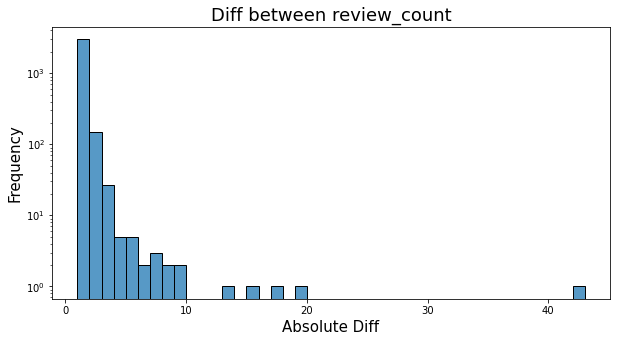

In [49]:
sub_plot = derived_df[derived_df['abs_diff']!=0]
fig, ax= plt.subplots(figsize=(10,5))
sns.histplot(data=sub_plot, x='abs_diff', binwidth=1)

ax.set_yscale('log')
ax.set_title("Diff between review_count", fontsize=18)
ax.set_ylabel("Frequency", fontsize=15)
ax.set_xlabel("Absolute Diff", fontsize=15)
plt.show()

In [50]:
derived_df.describe()

,review_count,review_id,abs_diff
count,152599.000000,152599.000000,152599.000000
mean,34.755372,34.756591,0.023565
std,113.296344,113.296817,0.219575
min,3.000000,1.000000,0.000000
25%,4.000000,4.000000,0.000000
50%,9.000000,9.000000,0.000000
75%,26.000000,26.000000,0.000000
max,7968.000000,7968.000000,43.000000


Describe what you see in the plot and the output from `describe()`. Does it appear that we have the all or most of the reviews for every business in the `business_data` table?

#### Written Answer:

> If we analyze the output of describe() function it shows exactly the same values for both business_data and review_data. As describe() is giving the average values 1 or 2 missing values are not making much of difference. Also if we look at graph the it is showing similar results. There are only 1 business for each missing value greater than 10. Highest bar shows that there are ~1000 business for which values in buisness_data and review_data doesn't match by difference 1. 



---

## Wrapping up

In this section of the Final Project, you will be focused on analyzing the Yelp users and the reviews they leave. Unlike the previous part, you will not be guided through each step and must decide how best to proceed.

Your analyses will involve the following 3 tables:

+ `yelp_academic_dataset_review.csv` - contains a subset of Yelp reviews with a `business_id` indicating what business the review is for and a `user_id` to identify the user leaving the review.

+ `yelp_academic_dataset_user.csv` - contains a subset of Yelp users identified by `user_id`

+ `yelp_academic_dataset_business.csv` - contains information about a subset of businesses having at least one Yelp review and every distinct business has a unique `business_id`. This is the table that we have been analyzing in Problems 1-19. 


In [51]:
# Import the user data table

user_data = pd.read_csv(r'yelp_academic_dataset_user.csv')
user_data.head(20)

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,compliment_profile,compliment_writer,cool,elite,fans,friends,funny,name,review_count,useful,user_id,yelping_since
0,2.00,0,0,0,0,0,0,0,0,0,0,0,0,None,0,None,0,Susan,1,0,lzlZwIpuSWXEnNS91wxjHw,2015-09-28
1,5.00,0,0,0,0,0,0,0,0,0,0,0,0,None,0,None,0,Daipayan,2,0,XvLBr-9smbI0m_a7dXtB7w,2015-09-05
2,4.00,0,0,0,0,0,0,0,0,0,0,0,0,None,0,None,0,Andy,1,0,QPT4Ud4H5sJVr68yXhoWFw,2016-07-21
3,4.05,0,0,0,0,0,0,0,0,0,0,0,0,None,0,None,0,Jonathan,19,0,i5YitlHZpf0B3R0s_8NVuw,2014-08-04
4,3.00,0,0,0,0,0,0,0,0,0,0,0,0,None,0,None,0,Shashank,3,0,s4FoIXE_LSGviTHBe8dmcg,2017-06-18
5,5.00,0,0,0,0,0,0,0,0,0,0,0,0,None,0,None,0,Stacey X Joe,3,0,ZcsZdHLiJGVvDHVjeTYYnQ,2014-08-27
6,5.00,0,0,0,0,0,0,0,0,0,0,0,0,None,0,None,0,Lindsay,2,0,h3p6aeVL7vrafSOM50SsCg,2016-02-02
7,5.00,0,0,0,0,0,0,0,0,0,0,0,0,None,0,None,0,Joshua,1,0,EbJMotYYkq-iq-v1u8wCYA,2013-03-20
8,2.77,0,0,0,0,0,0,0,0,0,0,0,0,None,1,None,0,Mike,11,8,nnB0AE1Cxp_0154xkhXelw,2014-07-11
9,4.00,0,0,0,0,0,0,0,0,0,0,0,1,None,0,None,3,Mitch,4,2,XoEnrhtJc2pcdlQ09d8Oug,2013-04-07


### Problem 20: Time Based Analysis (20 points)

<span  style="color:purple; font-size:16px">The `review_data` table contains a column `date` representing the date the review was created.</span>

Chose **ONE** of the questions below and use the `review_data` to answer.

1. Are more reviews posted during certain days of the week? What about certain months of the year? What patterns can you find about when reviews are posted? Draw a suitable plot.

1. Do reviews made on certain days of the week or certain months of the year tend to be higher/lower rated? What relationship can you find between the `stars` ratings of a review and when the reviews was posted? Draw a suitable plot.

In [52]:
# Your code here

# converting date colum into useful format

review_data['date']=pd.to_datetime(review_data['date'])
review_data["day"] = review_data['date'].map(lambda x: x.day_name())
review_data["month"] = review_data['date'].map(lambda x: x.month_name())
review_data["year"] = review_data['date'].map(lambda x: x.year)

Text(0.5, 0, 'Years')

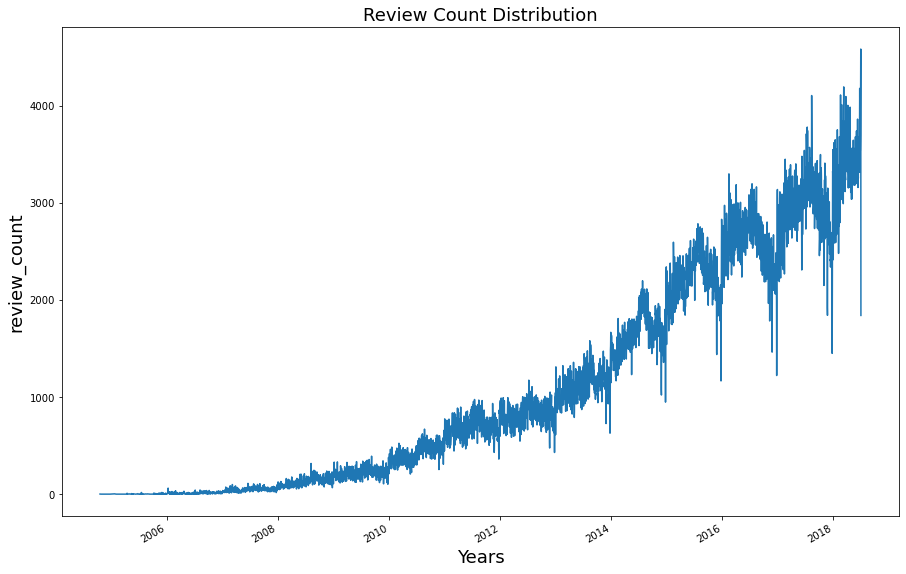

In [53]:

ax= review_data['date'].value_counts().plot(figsize=(15,10) )
plt.title('Review Count Distribution', fontsize=18)
plt.ylabel('review_count', fontsize=18)
plt.xlabel('Years', fontsize=18)

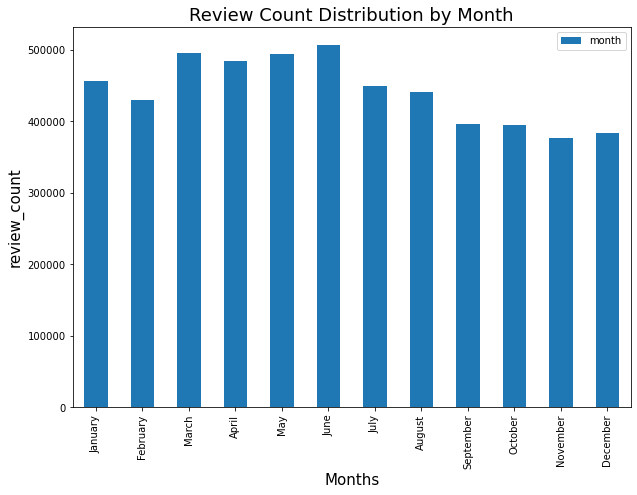

In [54]:
month_df=pd.DataFrame(review_data['month'].value_counts())
month_df=month_df.sort_index(key=lambda x: pd.to_datetime(x, format="%B"))
month_df.plot(kind='bar',figsize=(10,7))
plt.title('Review Count Distribution by Month', fontsize=18)
plt.ylabel('review_count', fontsize=15)
plt.xlabel('Months', fontsize=15)
plt.show()

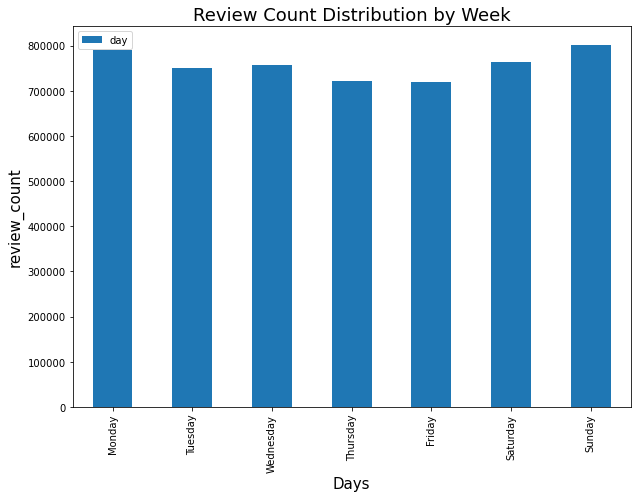

In [55]:
review_data['day']=pd.Categorical(review_data['day'], categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
                ordered=True)

day_df=pd.DataFrame(review_data['day'].value_counts())

day_df=day_df.sort_index()
day_df.plot(kind='bar',figsize=(10,7))
plt.title('Review Count Distribution by Week', fontsize=18)
plt.ylabel('review_count', fontsize=15)
plt.xlabel('Days', fontsize=15)
plt.show()

<span  style="color:purple; font-size:16px">Provide a brief explanation of your conclusions.</span>

#### Written Answer:

#### Written Answer:

> 1. First graph shows the overall distribution of review counts every year. This graph shows drastic change between no of reviews for 2006 to 2018 how it has increased. Also at the start of new year there or at the end of the year there is drop for number of reviews as compare to throughout the year.

> 2. Second graph shows the number of reviews by month. We can see there is a slight increase in the frequency from March to June. I can say considering the summer people are doing more outdoor activities like dining. As weather gets colder they are preferring to stay home so less review counts.

>3. As per the last graph there is an increase in review counts on weekends and also after weekend which will explain the increased number on Monday and decrease over the mid-week.

### Problem 21: Text Based Analysis (20 points)

<span  style="color:purple; font-size:16px">The `review_data` table contains a column `text` containing the full text of the review. Use these data to answer one of the questions below.</span>

Chose **ONE** of the questions below and use the `review_data` to answer.

1. Can you classify a review as having a *positive* or *negative* sentiment? If so, select five particular businesses (by `business_id`) and compare the business's average `stars` rating from the `business_data` to the proportion of reviews you have identified as having `positive` or `negative` sentiment for those particular businesses. Draw a suitable plot.

1. Do reviews with exclamation points seem to be either very highly rated or very low rated? Determine the `stars` distribution as a function of the number of exclamation points used in the review. Draw a suitable plot.


In [56]:
# Your code here

# counting the no of ! in each review

review_data['char_count']= review_data['text'].str.count('!')

In [57]:
# creating the temp df

char_df=review_data[['text','stars','char_count']]

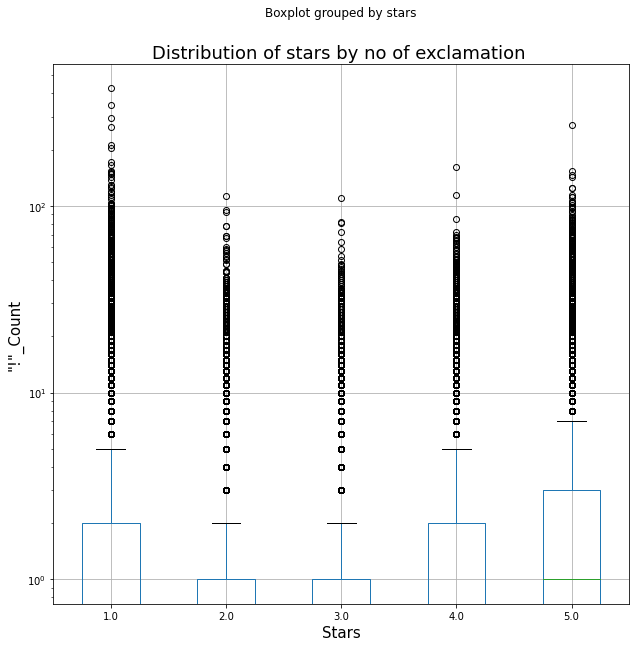

In [58]:

ax = char_df.boxplot(column='char_count', by='stars', figsize=(10, 10))
ax.set_yscale('log')
ax.set_ylabel('"!"_Count', fontsize=15)
ax.set_xlabel('Stars', fontsize=15)
ax.set_title('Distribution of stars by no of exclamation ', fontsize=18)
plt.show()

<span  style="color:purple; font-size:16px">Provide a brief explanation of your conclusions.</span>

#### Written Answer:

> Yes, our initial hypothesis is true, reviews with exclamation points seem to be either very highly rated or very low rated. Above boxplot shows that only stars 1 and 5 have the most number of average ! count in their review text.

### Problem 22: Analysis of Users (20 points)

<span  style="color:purple; font-size:16px">Create a function that accepts at least a `user_id` as input. This function use the `yelp_academic_dataset_user.csv` data as well as the `yelp_academic_dataset_review.csv` or `yelp_academic_dataset_business.csv` tables as necessary.</span>

<span  style="color:purple; font-size:16px">The function should automatically process the data relevant to the `user_id` passed and create at least one plot annotated with relevant, interesting information about the user that best answers the following questions:</span>

**What types of businesses has the user reviewed? Summarize the users review ratings by business category.**

Tip: It is OK if the results of your function are not very interesting for users with only a small number of reviews but your function should produce something reasonable for any `user_id` that may be passed.

In [59]:
# Your code here
business_data.head()

,address,attributes_happyhour,business_id,categories,city,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state,open_on_weekends
1,NaN,NaN,AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendo...",Henderson,0,35.960734,-114.939821,CK'S BBQ & Catering,NaN,89002,3,4.5,NV,1
3,211 W Monroe St,NaN,bFzdJJ3wp3PZssNEsyU23g,"Insurance, Financial Services",Phoenix,1,33.449999,-112.076979,Geico Insurance,NaN,85003,8,1.5,AZ,1
5,"20235 N Cave Creek Rd, Ste 1115",NaN,45bWSZtniwPRiqlivpS8Og,"Coffee & Tea, Food",Phoenix,1,33.671375,-112.030017,The Coffee Bean & Tea Leaf,NaN,85024,63,4.0,AZ,1
6,631 Bloor St W,NaN,9A2quhZLyWk0akUetBd8hQ,"Food, Bakeries",Toronto,0,43.664378,-79.414424,Bnc Cake House,Koreatown,M6G 1K8,7,4.0,ON,1
7,"3417 Derry Road E, Unit 103",NaN,6OuOZAok8ikONMS_T3EzXg,"Restaurants, Thai",Mississauga,1,43.712946,-79.632763,Thai One On,Ridgewood,L4T 1A8,7,2.0,ON,1


In [60]:
review_data.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,day,month,year,char_count
0,iCQpiavjjPzJ5_3gPD5Ebg,0,2011-02-25,0.0,x7mDIiDB3jEiPGPHOmDzyw,2.0,The pizza was okay. Not the best I've had. I p...,0.0,msQe1u7Z_XuqjGoqhB0J5g,Friday,February,2011,0
1,pomGBqfbxcqPv14c3XH-ZQ,0,2012-11-13,0.0,dDl8zu1vWPdKGihJrwQbpw,5.0,I love this place! My fiance And I go here atl...,0.0,msQe1u7Z_XuqjGoqhB0J5g,Tuesday,November,2012,5
2,jtQARsP6P-LbkyjbO1qNGg,1,2014-10-23,1.0,LZp4UX5zK3e-c5ZGSeo3kA,1.0,Terrible. Dry corn bread. Rib tips were all fa...,3.0,msQe1u7Z_XuqjGoqhB0J5g,Thursday,October,2014,0
3,elqbBhBfElMNSrjFqW3now,0,2011-02-25,0.0,Er4NBWCmCD4nM8_p1GRdow,2.0,Back in 2005-2007 this place was my FAVORITE t...,2.0,msQe1u7Z_XuqjGoqhB0J5g,Friday,February,2011,2
4,Ums3gaP2qM3W1XcA5r6SsQ,0,2014-09-05,0.0,jsDu6QEJHbwP2Blom1PLCA,5.0,Delicious healthy food. The steak is amazing. ...,0.0,msQe1u7Z_XuqjGoqhB0J5g,Friday,September,2014,1


In [61]:
def User_Fact(user_id):   
    
    #Getting the business_id for businesses review by given user
    sub_review_df= review_data.loc[review_data['user_id'] == user_id]
    business_id_list=sub_review_df['business_id'].unique()
   
    #Getting the business categories for businesses_id list
    temp_list=[]
    for i in business_id_list:

        sub_business_df = business_data.loc[business_data['business_id'] == i]
        categories = {}
        for cat in sub_business_df['categories']:
            l = str(cat).split(sep=",")
            for j in l:
                c = j.strip()
                c = c.lower()
                if not c in categories:
                    categories[c] = 1
                else:
                    categories[c] += 1

        for w in sorted(categories, key=categories.get, reverse=True):
            temp_list.append(w)
        
    # Getting the count of each categories for all the reviews
    cat_dict=dict((x,temp_list.count(x)) for x in set(temp_list))
    cat_dict={k: v for k, v in sorted(cat_dict.items(), key=lambda item: item[1])}
    
    
    #plotting the graph
    value_df=pd.DataFrame.from_dict(cat_dict, orient='index')
    ax=value_df.plot(kind='bar', figsize=(15,7))
    ax.set_ylabel('frequency', fontsize=15)
    ax.set_xlabel('Businesses', fontsize=15)
    ax.set_title('Type of Businesses User has Reviewed ', fontsize=18)
    plt.show()


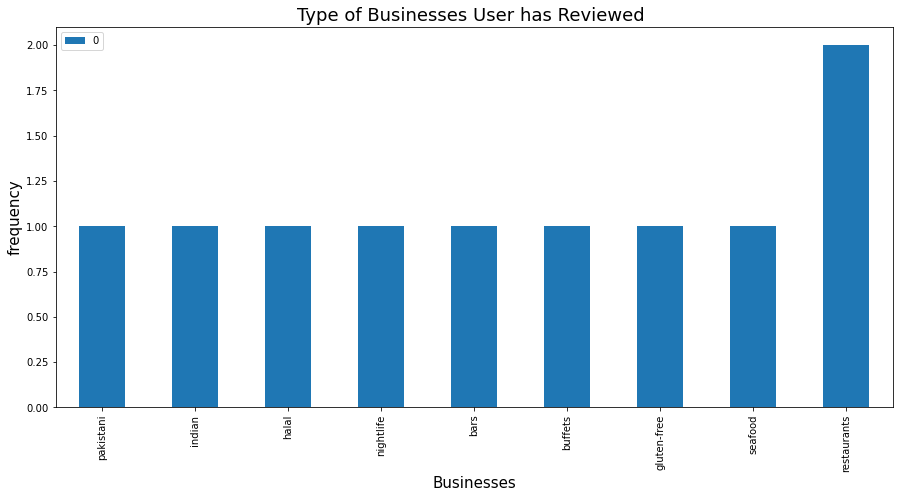

In [62]:
User_Fact('s4FoIXE_LSGviTHBe8dmcg')

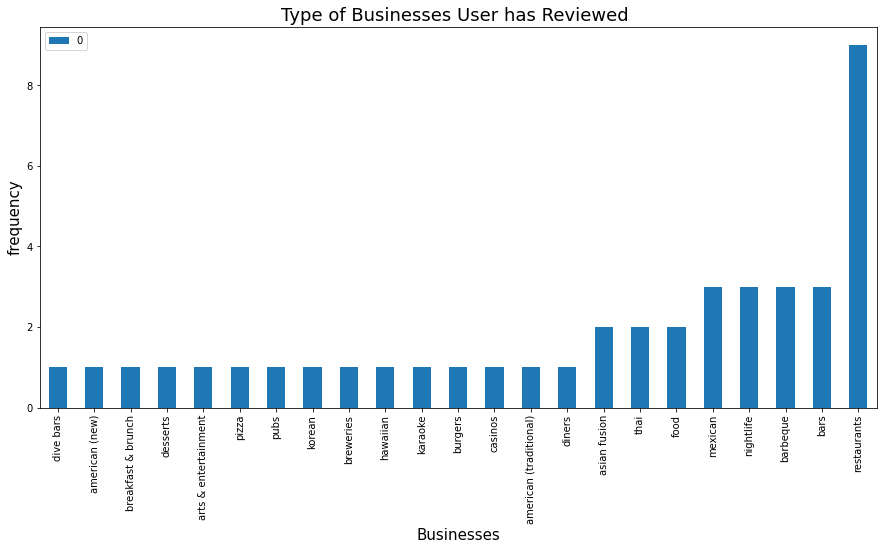

In [63]:
User_Fact('msQe1u7Z_XuqjGoqhB0J5g')